In [20]:
import pandas as pd
df = pd.read_csv("/content/MSFT.csv")

In [21]:
df

,Date,Open,High,Low,Close,Adj Close,Volume
0,1986-03-13,0.088542,0.101563,0.088542,0.097222,0.060980,1031788800
1,1986-03-14,0.097222,0.102431,0.097222,0.100694,0.063158,308160000
2,1986-03-17,0.100694,0.103299,0.100694,0.102431,0.064247,133171200
3,1986-03-18,0.102431,0.103299,0.098958,0.099826,0.062613,67766400
4,1986-03-19,0.099826,0.100694,0.097222,0.098090,0.061524,47894400
...,...,...,...,...,...,...,...
9209,2022-09-26,237.050003,241.449997,236.899994,237.449997,237.449997,27694200
9210,2022-09-27,239.979996,241.800003,234.500000,236.410004,236.410004,27018700
9211,2022-09-28,236.809998,242.330002,234.729996,241.070007,241.070007,29029700
9212,2022-09-29,238.889999,239.949997,234.410004,237.500000,237.500000,27484200


In [22]:
df = df[['Date', 'Close']]
df

,Date,Close
0,1986-03-13,0.097222
1,1986-03-14,0.100694
2,1986-03-17,0.102431
3,1986-03-18,0.099826
4,1986-03-19,0.098090
...,...,...
9209,2022-09-26,237.449997
9210,2022-09-27,236.410004
9211,2022-09-28,241.070007
9212,2022-09-29,237.500000


In [23]:
import datetime
def str_to_datetime(s):
  x=s.split("-")
  year, month, day = int(x[0]), int(x[1]), int(x[2])
  return datetime.datetime(year=year, month=month, day=day)

In [24]:
df['Date']= df['Date'].apply(str_to_datetime)
df['Date']

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


0      1986-03-13
1      1986-03-14
2      1986-03-17
3      1986-03-18
4      1986-03-19
          ...    
9209   2022-09-26
9210   2022-09-27
9211   2022-09-28
9212   2022-09-29
9213   2022-09-30
Name: Date, Length: 9214, dtype: datetime64[ns]

In [25]:
df = df.set_index('Date')
df.head()

,Close
Date,
1986-03-13,0.097222
1986-03-14,0.100694
1986-03-17,0.102431
1986-03-18,0.099826
1986-03-19,0.098090


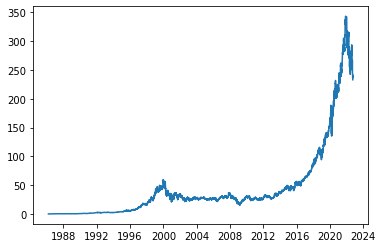

In [26]:
import matplotlib.pyplot as plt
plt.plot(df.index, df['Close'])
plt.show()

In [27]:
df['Close-1'] = df['Close'].shift(1)
df['Close-2'] = df['Close'].shift(2)
df['Close-3'] = df['Close'].shift(3)

In [28]:
df = df.tail(-3)
df = df.reset_index(drop=False)
df.head(7)

,Date,Close,Close-1,Close-2,Close-3
0,1986-03-18,0.099826,0.102431,0.100694,0.097222
1,1986-03-19,0.098090,0.099826,0.102431,0.100694
2,1986-03-20,0.095486,0.098090,0.099826,0.102431
3,1986-03-21,0.092882,0.095486,0.098090,0.099826
4,1986-03-24,0.090278,0.092882,0.095486,0.098090
5,1986-03-25,0.092014,0.090278,0.092882,0.095486
6,1986-03-26,0.094618,0.092014,0.090278,0.092882


In [29]:
# To Numpy Matrix:
import numpy as np
df_np = df.to_numpy()
X_date = df_np[:,0]
X_feature = df_np[:,2:5]
X = X_feature.reshape(len(X_date), X_feature.shape[1], 1)
y = df_np[:,1]
X = X.astype(np.float32)
y = y.astype(np.float32)

In [30]:
print(X_date.shape, X.shape, y.shape)

(9211,) (9211, 3, 1) (9211,)


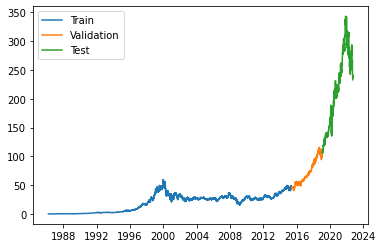

In [31]:
# Split
q_80 = int(0.8*(X_date.shape[0]))
q_90 = int(0.9*(X_date.shape[0]))
date_train, date_val, date_test = X_date[0:q_80], X_date[q_80:q_90], X_date[q_90:]
X_train, X_val, X_test = X[0:q_80], X[q_80:q_90], X[q_90:]
y_train, y_val, y_test = y[0:q_80], y[q_80:q_90], y[q_90:]
plt.plot(date_train, y_train)
plt.plot(date_val, y_val)
plt.plot(date_test, y_test)
plt.legend(['Train','Validation','Test'])
plt.show()

In [39]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import layers

model = Sequential([
    layers.Input((3,1)),
    layers.LSTM(64),
    layers.Dropout(0.3),
    layers.Dense(32, activation='relu'),
    layers.Dense(32, activation='relu'),
    layers.Dense(1)
])
model.compile(loss='mse', optimizer=Adam(learning_rate=0.0025), metrics=['mean_absolute_error'])
model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=45)

Epoch 1/45
231/231 [==============================] - 3s 4ms/step - loss: 54.0837 - mean_absolute_error: 3.5164 - val_loss: 838.6989 - val_mean_absolute_error: 21.9750
Epoch 2/45
231/231 [==============================] - 1s 3ms/step - loss: 5.6606 - mean_absolute_error: 1.5274 - val_loss: 701.9719 - val_mean_absolute_error: 19.8546
Epoch 3/45
231/231 [==============================] - 1s 3ms/step - loss: 5.0923 - mean_absolute_error: 1.4455 - val_loss: 664.3176 - val_mean_absolute_error: 18.9601
Epoch 4/45
231/231 [==============================] - 1s 3ms/step - loss: 4.1211 - mean_absolute_error: 1.3293 - val_loss: 570.3537 - val_mean_absolute_error: 17.9068
Epoch 5/45
231/231 [==============================] - 1s 3ms/step - loss: 3.6032 - mean_absolute_error: 1.2417 - val_loss: 451.4181 - val_mean_absolute_error: 14.9014
Epoch 6/45
231/231 [==============================] - 1s 3ms/step - loss: 2.6480 - mean_absolute_error: 1.0801 - val_loss: 344.5273 - val_mean_absolute_error: 12.12

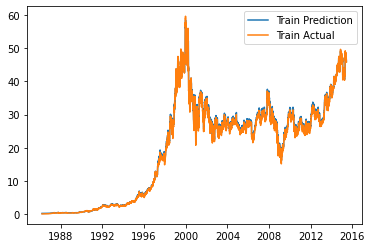

In [40]:
y_train_pred = model.predict(X_train)
plt.plot(date_train, y_train_pred)
plt.plot(date_train, y_train)
plt.legend(['Train Prediction', 'Train Actual'])
plt.show()

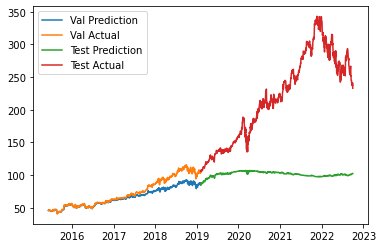

In [41]:
y_val_pred = model.predict(X_val)
y_test_pred = model.predict(X_test)
plt.plot(date_val, y_val_pred)
plt.plot(date_val, y_val)
plt.plot(date_test, y_test_pred)
plt.plot(date_test, y_test)
plt.legend(['Val Prediction', 'Val Actual','Test Prediction', 'Test Actual'])
plt.show()

In [46]:
# Doesn't extrapolate well. Only use data in the recent two years.
df = pd.read_csv("/content/MSFT.csv")
df = df[['Date', 'Close']]
df['Date']= df['Date'].apply(str_to_datetime)
d = datetime.datetime(2021, 1, 1)
df = df.loc[df['Date']>=d]
df = df.set_index('Date')
df['Close-1'] = df['Close'].shift(1)
df['Close-2'] = df['Close'].shift(2)
df['Close-3'] = df['Close'].shift(3)
df = df.tail(-3)
df = df.reset_index(drop=False)
df_np = df.to_numpy()
X_date = df_np[:,0]
X_feature = df_np[:,2:5]
X = X_feature.reshape(len(X_date), X_feature.shape[1], 1)
y = df_np[:,1]
X = X.astype(np.float32)
y = y.astype(np.float32)
print(X_date.shape, X.shape, y.shape)

(437,) (437, 3, 1) (437,)


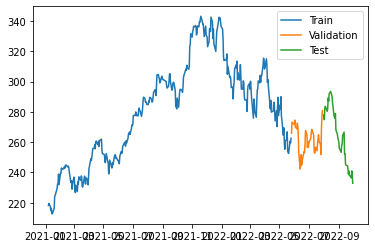

In [59]:
q_80 = int(0.8*(X_date.shape[0]))
q_90 = int(0.9*(X_date.shape[0]))
date_train, date_val, date_test = X_date[0:q_80], X_date[q_80:q_90], X_date[q_90:]
X_train, X_val, X_test = X[0:q_80], X[q_80:q_90], X[q_90:]
y_train, y_val, y_test = y[0:q_80], y[q_80:q_90], y[q_90:]
plt.plot(date_train, y_train)
plt.plot(date_val, y_val)
plt.plot(date_test, y_test)
plt.legend(['Train','Validation','Test'])
plt.show()

In [56]:
model2 = Sequential([
    layers.Input((3,1)),
    layers.LSTM(64),
    layers.Dense(32, activation='relu'),
    layers.Dense(32, activation='relu'),
    layers.Dense(1)
])
model2.compile(loss='mse', optimizer=Adam(learning_rate=0.001), metrics=['mean_absolute_error'])
model2.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=100)

Epoch 1/100
11/11 [==============================] - 2s 37ms/step - loss: 79693.1953 - mean_absolute_error: 280.3666 - val_loss: 67802.6562 - val_mean_absolute_error: 260.2335
Epoch 2/100
11/11 [==============================] - 0s 4ms/step - loss: 79128.0234 - mean_absolute_error: 279.3563 - val_loss: 67159.4219 - val_mean_absolute_error: 258.9947
Epoch 3/100
11/11 [==============================] - 0s 4ms/step - loss: 78313.0547 - mean_absolute_error: 277.8939 - val_loss: 66273.7188 - val_mean_absolute_error: 257.2792
Epoch 4/100
11/11 [==============================] - 0s 4ms/step - loss: 77283.5312 - mean_absolute_error: 276.0411 - val_loss: 65223.3867 - val_mean_absolute_error: 255.2297
Epoch 5/100
11/11 [==============================] - 0s 4ms/step - loss: 75949.6406 - mean_absolute_error: 273.6027 - val_loss: 63582.7227 - val_mean_absolute_error: 251.9950
Epoch 6/100
11/11 [==============================] - 0s 4ms/step - loss: 73721.9531 - mean_absolute_error: 269.4905 - val_lo

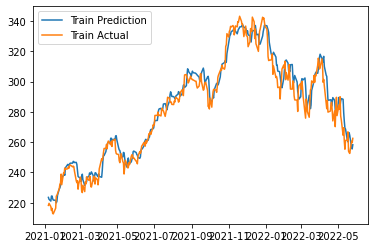

In [60]:
y_train_pred = model2.predict(X_train)
plt.plot(date_train, y_train_pred)
plt.plot(date_train, y_train)
plt.legend(['Train Prediction', 'Train Actual'])
plt.show()

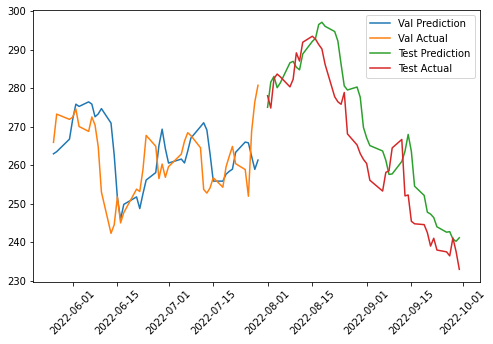

In [70]:
y_val_pred = model2.predict(X_val)
y_test_pred = model2.predict(X_test)
plt.figure(figsize=(8,5))
plt.plot(date_val, y_val_pred)
plt.plot(date_val, y_val)
plt.plot(date_test, y_test_pred)
plt.plot(date_test, y_test)
plt.legend(['Val Prediction', 'Val Actual','Test Prediction', 'Test Actual'])
plt.xticks(rotation=45)
plt.show()

In [65]:
# Looks pretty good!
# Predict long-term:
date_last3 = date_test[-3:,]
y_test_last3 = y_test[-3:,]
print(date_last3)
print(y_test_last3)

[Timestamp('2022-09-28 00:00:00') Timestamp('2022-09-29 00:00:00')
 Timestamp('2022-09-30 00:00:00')]
[241.07 237.5  232.9 ]


In [75]:
new_X_pred = np.array([[[y_test_last3[2]],[y_test_last3[1]],[y_test_last3[0]]]])
new_y_pred = model2.predict(new_X_pred)
print(new_y_pred)

[[242.53241]]


In [87]:
last1, last2 = new_X_pred[0][0][0], new_X_pred[0][1][0]
new_X_pred = np.array([[[last1],[last2],new_y_pred[0]]])
new_X_pred

array([[[232.9    ],
        [237.5    ],
        [242.53241]]], dtype=float32)

In [89]:
print(model2.predict(new_X_pred)[0][0])

243.38632


In [96]:
pred = np.array([232.899994,242.53241,243.38632])
pred = np.asarray(pred).astype('float32')
for i in range(30):
  new_X_pred = np.array([[[pred[len(pred)-3]], [pred[len(pred)-2]], [pred[len(pred)-1]]]])
  y_pred = model2.predict(new_X_pred)
  pred = np.append(pred, y_pred[0][0])
print(pred)
print(new_X_pred)

[232.9     242.53241 243.38632 245.61476 247.39037 249.25922 251.06061
 252.86421 254.66017 256.46454 258.28326 260.12506 261.9969  263.90573
 265.85794 267.85968 269.91647 272.03345 274.21506 276.46512 278.78653
 281.18134 283.65005 286.19168 288.80344 291.48    294.21344 296.9925
 299.80182 302.62216 305.42953 308.19583 310.88937]
[[[302.62216]
  [305.42953]
  [308.19583]]]


In [109]:
# Create date array:
import datetime
from datetime import datetime, timedelta, date
date0 = date(year=2022, month=9, day=30)
date_pred = np.array([date0])
i=1
while (len(date_pred)<33):
  cur_date = date0 + timedelta(days=i)
  if (cur_date.weekday()<5):
    date_pred = np.append(date_pred, cur_date)
  i=i+1
print(date_pred)

[datetime.date(2022, 9, 30) datetime.date(2022, 10, 3)
 datetime.date(2022, 10, 4) datetime.date(2022, 10, 5)
 datetime.date(2022, 10, 6) datetime.date(2022, 10, 7)
 datetime.date(2022, 10, 10) datetime.date(2022, 10, 11)
 datetime.date(2022, 10, 12) datetime.date(2022, 10, 13)
 datetime.date(2022, 10, 14) datetime.date(2022, 10, 17)
 datetime.date(2022, 10, 18) datetime.date(2022, 10, 19)
 datetime.date(2022, 10, 20) datetime.date(2022, 10, 21)
 datetime.date(2022, 10, 24) datetime.date(2022, 10, 25)
 datetime.date(2022, 10, 26) datetime.date(2022, 10, 27)
 datetime.date(2022, 10, 28) datetime.date(2022, 10, 31)
 datetime.date(2022, 11, 1) datetime.date(2022, 11, 2)
 datetime.date(2022, 11, 3) datetime.date(2022, 11, 4)
 datetime.date(2022, 11, 7) datetime.date(2022, 11, 8)
 datetime.date(2022, 11, 9) datetime.date(2022, 11, 10)
 datetime.date(2022, 11, 11) datetime.date(2022, 11, 14)
 datetime.date(2022, 11, 15)]


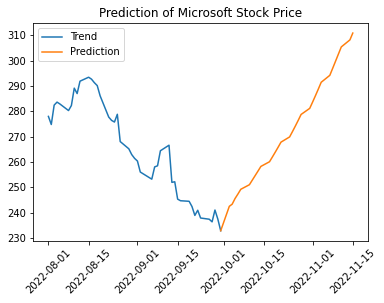

In [114]:
plt.plot(date_test, y_test)
plt.plot(date_pred, pred)
plt.title('Prediction of Microsoft Stock Price')
plt.legend(['Trend', 'Prediction'])
plt.xticks(rotation=45)
plt.show()